In [5]:
from chic_functions import core_data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [34]:
sim_dir = "D:\\Geodynamo_Core_Simulation\\tc_251024_M1-5_Fe30-60"
sim_dir2 = "D:\\Geodynamo_Core_Simulation\\tc_250924_M1-3_Fe30-60"
simdir3 = "D:\\Geodynamo_Core_Simulation\\tc_181124_M1-5_Fe30-60"
simdir4 = "D:\\Geodynamo_Core_Simulation\\cc_081124_M1-5_Fe30-60"
data_name = "data_core.res"

core, texture = core_data(sim_dir, data_name)
core2, texture2 = core_data(sim_dir2, data_name)
core3, texture3 = core_data(simdir3, data_name)
core4, texture4 = core_data(simdir4, data_name)

0 M1_Fe30_sFe6-5_p
1 M1_Fe60_sFe6-5_p
2 M2_Fe30_sFe6-5_p
3 M2_Fe60_sFe6-5_p
4 M3_Fe30_sFe6-5_p
5 M3_Fe60_sFe6-5_p
6 M4_Fe30_sFe6-5_p
7 M4_Fe60_sFe6-5_p
8 M5_Fe30_sFe6-5_p
9 M5_Fe60_sFe6-5_p
10 Plots
M1_Fe30_sFe6-5_p loaded
M1_Fe60_sFe6-5_p loaded
0 M1_Fe30_sFe6-5_p
1 M1_Fe60_sFe6-5_p
2 M2_Fe30_sFe6-5_p
3 M2_Fe60_sFe6-5_p
4 M2_Fe60_sFe6-5_p_brocken
5 M3_Fe30_sFe6-5_p
6 Plots
M1_Fe30_sFe6-5_p loaded
M1_Fe60_sFe6-5_p loaded
0 M1_Fe30_sFe6-5_p
1 M1_Fe60_sFe6-5_p
M1_Fe30_sFe6-5_p loaded
M1_Fe60_sFe6-5_p loaded
0 M1_Fe30_sFe6-5_p
1 M1_Fe60_sFe6-5_p
2 Plots
M1_Fe30_sFe6-5_p loaded
M1_Fe60_sFe6-5_p loaded


In [35]:
# load palea dipole mooment data
data_dir = "C:\\Users\\louis\\Documents\\geodynamo\\core\\"
paleo_data = "PDM_VDM_data.csv"
paleo_data = os.path.join(data_dir, paleo_data)
paleo_data = pd.read_csv(paleo_data, sep=r',', header=0)

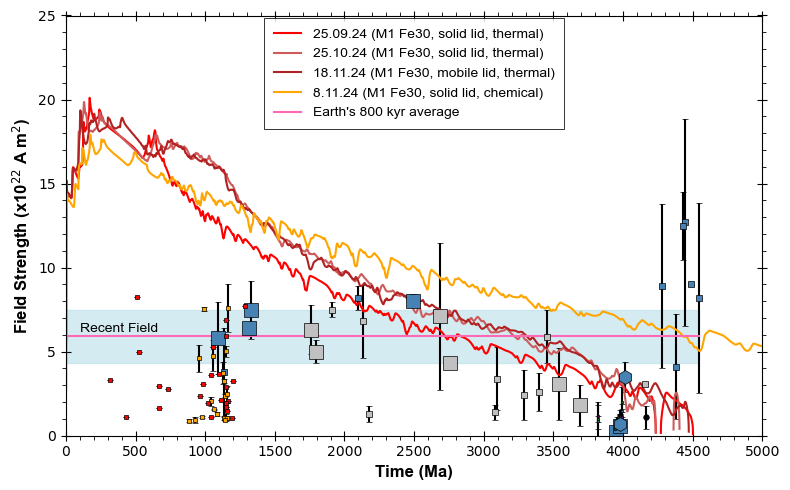

In [46]:
k, l = list(core.keys()), list(paleo_data.keys())
ind = list(core[k[0]].keys())
time_now = 4.543e3
scale = 1.0

t = np.linspace(0, time_now, 100)

fig, ax = plt.subplots(1, 1, figsize=(8*scale,5*scale))

for i in range(len(paleo_data[l[0]])):
    if paleo_data['Type'][i] == 'PDM':
        ms = 10*scale
    elif paleo_data['Type'][i] == 'VDM':
        ms = 2*scale
    elif paleo_data['Type'][i] == 'PDM/VDM':
        ms = 4*scale

    if paleo_data['Method'][i][:3] == 'WR':
        color = 'silver'
        fmt = 's'
    elif paleo_data['Method'][i][:3] == 'SCP':
        color = 'steelblue'
        fmt = 's'
    elif paleo_data['Method'][i][:3] == 'The' and paleo_data['Study'][i][:3] == 'Tar':
        color = 'orange'
        fmt = 's'
        ms = 3*scale
    elif paleo_data['Method'][i][:3] == '565':
        color = 'red'
        fmt = 's'
        ms = 3*scale
    elif paleo_data['Method'][i][:3] == 'The':
        color = 'steelblue'
        fmt = 'h'
    elif paleo_data['Method'][i][:3] == 'Mic':
        color = 'green'
        fmt = 'h'
    elif paleo_data['Method'][i][:3] == 'Wil':
        color = 'black'
        fmt = 'h'
    elif paleo_data['Method'][i][:3] == 'Sha':
        color = 'purple'
        fmt = 'h'
    else:
        color = 'black'
        fmt = 'o'
    
    ax.errorbar(time_now - paleo_data[l[1]][i], paleo_data[l[2]][i]/1.0e22, yerr=paleo_data[l[3]][i]/1e22, 
                fmt=fmt, color=color, markersize=ms, markeredgewidth = 0.5, markeredgecolor='black',
                ecolor='black', capsize=2, capthick=0.01)  

ax.plot(core2[k[0]][ind[0]], core2[k[0]][ind[9]]/1.0e22, color = 'red', label='25.09.24 (M1 Fe30, solid lid, thermal)')
ax.plot(core[k[0]][ind[0]], core[k[0]][ind[9]]/1.0e22, color = 'indianred', label='25.10.24 (M1 Fe30, solid lid, thermal)')
ax.plot(core3[k[0]][ind[0]], core3[k[0]][ind[9]]/1.0e22, color = 'firebrick', label='18.11.24 (M1 Fe30, mobile lid, thermal)')
ax.plot(core4[k[0]][ind[0]], core4[k[0]][ind[9]]/1.0e22, color = 'orange', label='8.11.24 (M1 Fe30, solid lid, chemical)')
ax.plot(t, np.ones(len(t))*5.91, color='hotpink', linestyle='-', label='Earth\'s 800 kyr average')
ax.fill_between(t, 5.91-1.56, 5.91+1.56, color='lightblue', alpha=0.5)

ax.text(100, 6.2, 'Recent Field', color='black', font='Arial', fontsize=10)

ax.set_xlabel(r'Time (Ma)', fontweight='bold', font='Arial', fontsize=12)
ax.set_ylabel(r'Field Strength (x10$^{22}$ A m$^2$)', fontweight='bold',font='Arial', fontsize=12)
ax.tick_params(axis='both', which='major', length=7, direction='inout', top=True, right=True)
ax.tick_params(axis='both', which='minor', length=3, direction='out', top=True, right=True)
ax.xaxis.set_major_locator(plt.MultipleLocator(500))
ax.xaxis.set_minor_locator(plt.MultipleLocator(100))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

ax.set_xlim(0, 5000)
ax.set_ylim(0, 25)

legend = ax.legend(prop={'family': 'Arial'})
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(.7)
legend.get_frame().set_boxstyle("Square")

plt.tight_layout()